In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import SGDClassifier, LassoCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import json
import random

### Load Training Data

In [2]:
data = json.loads(open('data/train.json').read())

#   replacing spaces with underlines, make into strings for count vectorizer
X_full = ([[ingredient.replace(' ', '_') for ingredient in food['ingredients']]\
      for food in data])

#  ^Look at the badass list comprehension right there
X_full = [' '.join(ingredients) for ingredients in X_full]

y_full = map(lambda x: x['cuisine'], data)

X_full, y_full = np.asarray(X_full), np.asarray(y_full)

assert len(X_full) == len(y_full)

### Load Test Data

In [3]:
test_data = json.loads(open('data/test.json').read())

X_out_test = ([[ingredient.replace(' ', '_').encode('ascii', 'ignore')\
                for ingredient in food['ingredients']]\
                for food in test_data])
X_out_test = [' '.join(ingredients) for ingredients in X_out_test]
X_out_test = np.asarray(X_out_test)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

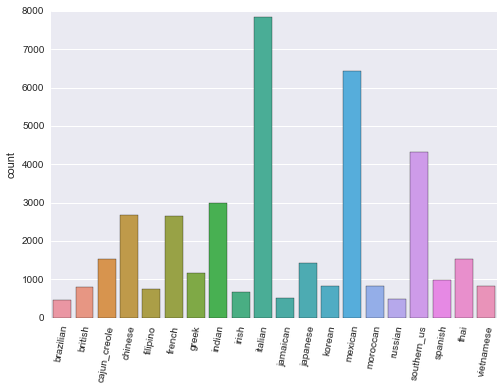

In [43]:
g = sns.countplot(sorted(y_full))
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

In [61]:
to_idf = Pipeline([('count_vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer())])

idfs = to_idf.fit_transform(X_full)

clf_1 = SGDClassifier(alpha=1e-5, n_iter=70, penalty='elasticnet')
clf_2 = LassoCV()
clf_3 = SVC()

clf_1.fit(idfs, y_full)
clf_3.fit(idfs, y_full)

all_probs = []

for X, y in zip(X_full, y_full):
    all_probs.append(max(clf_1.predict_proba([X], [Y]), clf_3.predict_proba([X], [Y])))

In [ ]:
# df = pd.DataFrame(columns=['id','cuisine'])
# df['id'] = map(lambda x: x['id'], test_data)

# preds = full_clf.predict(X_out_test)
# df['cuisine'] = preds
# df.index=df.id
# df = df.drop('id', axis=1)
# df.head()

# df.to_csv('submissions/submission_XXX.csv')